<a href="https://colab.research.google.com/github/hogitayden/Linear-Regression/blob/master/Giua_ky_Data_Analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Used Car Prediction <h1>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. **price: continuous from 5118 to 45400.**

<b> <font color ='blue' >1. Data Exploration </font> <b> 

In [ ]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',names=['symboling', 'normalized-losses','make','fuel-type','aspiration','num-of-doors'
                                             ,'body-style','drive-wheels','engine-location','wheel-base','length',
                                             'width','height','curb-weight','engine-type','num-of-cylinders','engine-size',
                                             'fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm',
                                             'city-mpg','highway-mpg','price'],header=None)

In [ ]:
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
#Replace "?" values = null values  
dataset.replace("?", np.nan, inplace = True)
dataset.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#check null values 
null_data=dataset.isnull()
null_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Checking Column Quality 
for i in null_data.columns.values.tolist():
    print(i)
    print(null_data[i].value_counts())
    print("----------------------------------")

symboling
False    205
Name: symboling, dtype: int64
----------------------------------
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
----------------------------------
make
False    205
Name: make, dtype: int64
----------------------------------
fuel-type
False    205
Name: fuel-type, dtype: int64
----------------------------------
aspiration
False    205
Name: aspiration, dtype: int64
----------------------------------
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
----------------------------------
body-style
False    205
Name: body-style, dtype: int64
----------------------------------
drive-wheels
False    205
Name: drive-wheels, dtype: int64
----------------------------------
engine-location
False    205
Name: engine-location, dtype: int64
----------------------------------
wheel-base
False    205
Name: wheel-base, dtype: int64
----------------------------------
length
False    205
Name: length, dtype: int64
-----------

In [ ]:
#Check Mean of variables that have NaN values 
print("Average of normalized-losses:","%.3f" % dataset["normalized-losses"].astype("float").mean(axis=0))
print("Average of bore:","%.3f" % dataset['bore'].astype('float').mean(axis=0))
print("Average of horsepower:", "%.3f" % dataset['horsepower'].astype('float').mean(axis=0))
print("Average of peak rpm:", "%.3f" % dataset['peak-rpm'].astype('float').mean(axis=0))
print("Average of stroke:", "%.3f" % dataset['stroke'].astype('float').mean(axis=0))



Average of normalized-losses: 122.000
Average of bore: 3.330
Average of horsepower: 104.256
Average of peak rpm: 5125.369
Average of stroke: 3.255


In [ ]:
#Replace NaN with Mean 
dataset["normalized-losses"].replace(np.nan, "%.3f" % dataset["normalized-losses"].astype("float").mean(axis=0), inplace=True)
dataset["bore"].replace(np.nan,"%.3f" % dataset['bore'].astype('float').mean(axis=0), inplace=True)
dataset['horsepower'].replace(np.nan,"%.3f" % dataset['horsepower'].astype('float').mean(axis=0), inplace=True)
dataset['peak-rpm'].replace(np.nan, "%.3f" % dataset['peak-rpm'].astype('float').mean(axis=0), inplace=True)
dataset['stroke'].replace(np.nan, "%.3f" % dataset['stroke'].astype('float').mean(axis=0), inplace=True)






In [ ]:
dataset['num-of-doors'].value_counts()
print("Maximum occurence value of Num-Of-Doors is :",dataset['num-of-doors'].value_counts().idxmax())

Maximum occurence value of Num-Of-Doors is : four


In [ ]:
#Replace NaN with maximum occurence values
dataset["num-of-doors"].replace(np.nan, dataset['num-of-doors'].value_counts().idxmax(), inplace=True)


In [ ]:
#Drop NaN Price values due to being NaN dependent variables
dataset.dropna(subset=["price"], axis=0, inplace=True)


In [ ]:
dataset.reset_index(drop=True,inplace=True)
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.000,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
#Recheck data types 
dataset.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
#Convert numerical variables to numerical data types
dataset[["normalized-losses","bore", "stroke","price","peak-rpm","horsepower"]] = dataset[["normalized-losses","bore", "stroke","price","peak-rpm","horsepower"]].astype("float")


In [ ]:
dataset.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
#Describe numerical variables
dataset.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330697,3.256866,10.164279,103.405532,5117.665363,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365699,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
#Describe all variables 
dataset.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,174.200995,65.889055,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330697,3.256866,10.164279,103.405532,5117.665363,25.179104,30.686567,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,12.322175,2.101471,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.316048,4.004965,37.365699,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.800000,64.100000,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.500000,66.600000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


<b><i> Standardize Data <i><b>

In [ ]:
#Convert Miles Per Gallon to Litres per 100 kilometres
## (formula : 235 divided by mpg)
dataset['city-Litres/100km'] = 235/dataset["city-mpg"]
dataset['highway-Litres/100km'] = 235/dataset["highway-mpg"]






In [ ]:
dataset.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-Litres/100km,highway-Litres/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


<b>Normalize Data <b>

In [ ]:
dataset['length_normalized'] = dataset['length']/dataset['length'].max()
dataset['width_normalized'] = dataset['width']/dataset['width'].max()
dataset['height_normalized'] = dataset['height']/dataset['height'].max()

In [ ]:
dataset.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-Litres/100km,highway-Litres/100km,length_normalized,width_normalized,height_normalized
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0.848630,0.919444,0.908027
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0.848630,0.922222,0.908027


<b> <font color ='blue' >2. Data Visualization </font> <b> 

In [ ]:
dataset.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-Litres/100km,highway-Litres/100km,length_normalized,width_normalized,height_normalized
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139987,-0.008199,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.365404,-0.242423,-0.550160
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029846,0.055022,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,0.019424,0.086802,-0.373737
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493234,0.158033,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.876024,0.814507,0.590742
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608963,0.123964,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,1.000000,0.857170,0.492063
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544884,0.188824,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.857170,1.000000,0.306002
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180417,-0.060617,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.492063,0.306002,1.000000
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644055,0.167445,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.880665,0.866201,0.307581
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572585,0.205963,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.685025,0.729436,0.074694
bore,-0.139987,-0.029846,0.493234,0.608963,0.544884,0.180417,0.644055,0.572585,1.000000,-0.055390,0.001260,0.566939,-0.267357,-0.582051,-0.591330,0.543155,0.554640,0.559134,0.608963,0.544884,0.180417
stroke,-0.008199,0.055022,0.158033,0.123964,0.188824,-0.060617,0.167445,0.205963,-0.055390,1.000000,0.187876,0.098263,-0.063611,-0.033921,-0.034606,0.082270,0.036090,0.047057,0.123964,0.188824,-0.060617


In [ ]:
for column in dataset.columns.values.tolist():
    print(dataset[[column, "price"]].corr())
    print(" ")

           symboling     price
symboling   1.000000 -0.082391
price      -0.082391  1.000000
 
                   normalized-losses     price
normalized-losses           1.000000  0.133999
price                       0.133999  1.000000
 
       price
price    1.0
 
       price
price    1.0
 
       price
price    1.0
 
       price
price    1.0
 
       price
price    1.0
 
       price
price    1.0
 
       price
price    1.0
 
            wheel-base     price
wheel-base    1.000000  0.584642
price         0.584642  1.000000
 
          length     price
length  1.000000  0.690628
price   0.690628  1.000000
 
          width     price
width  1.000000  0.751265
price  0.751265  1.000000
 
          height     price
height  1.000000  0.135486
price   0.135486  1.000000
 
             curb-weight     price
curb-weight     1.000000  0.834415
price           0.834415  1.000000
 
       price
price    1.0
 
       price
price    1.0
 
             engine-size     price
engine-size     1.000

#Since there are also qualitative (nominal) data, we wont consider their correlations but only numerical data

<b> Examine Correlation between independent and dependent variable


<b> Only consider those variables with high correlation <b> (more than 0.7)

In [ ]:
dataset[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


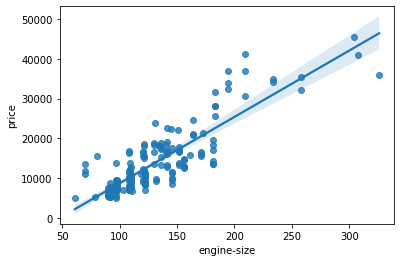

In [ ]:
#Check correlation between engine size and price
sns.regplot(x="engine-size", y="price", data=dataset)

In [ ]:
dataset[["horsepower", "price"]].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


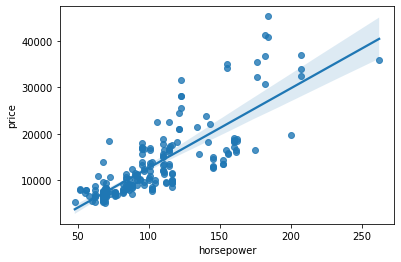

In [ ]:
#Check correlation between horsepower and price
sns.regplot(x="horsepower", y="price", data=dataset)

In [ ]:
dataset[["city-Litres/100km", "price"]].corr()

,city-Litres/100km,price
city-Litres/100km,1.000000,0.789898
price,0.789898,1.000000


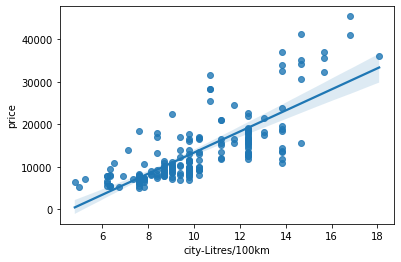

In [ ]:
#Check correlation between city - litres per 100km
sns.regplot(x="city-Litres/100km", y="price", data=dataset)

In [ ]:
dataset[["highway-Litres/100km", "price"]].corr()

,highway-Litres/100km,price
highway-Litres/100km,1.000000,0.801118
price,0.801118,1.000000


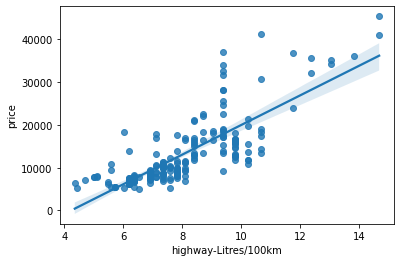

In [ ]:
#Check correlation between highway - litres per 100km
sns.regplot(x="highway-Litres/100km", y="price", data=dataset)

In [ ]:
dataset[["curb-weight", "price"]].corr()

,curb-weight,price
curb-weight,1.000000,0.834415
price,0.834415,1.000000


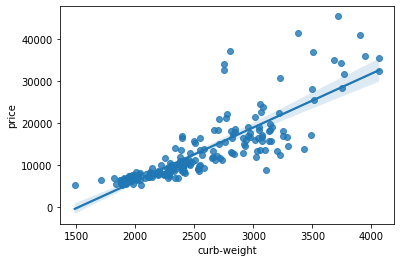

In [ ]:
sns.regplot(x="curb-weight", y="price", data=dataset)

<b> Since this is only Linear Regression model, we dont consider nominal data or qualitative data because they belong to logistic regression model <b>

In [ ]:
dataset[["length", "price"]].corr()

,length,price
length,1.000000,0.690628
price,0.690628,1.000000


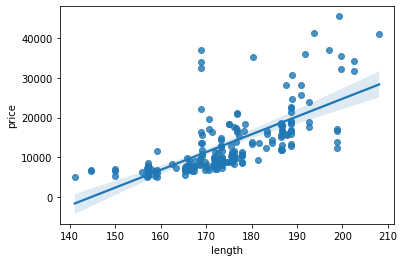

In [ ]:
sns.regplot(x="length", y="price", data=dataset)

In [ ]:
dataset[["width", "price"]].corr()

,width,price
width,1.000000,0.751265
price,0.751265,1.000000


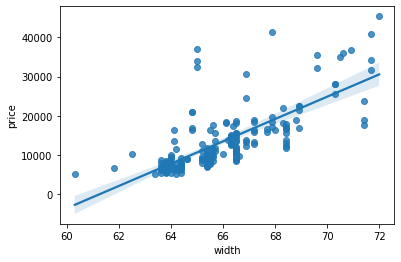

In [ ]:
sns.regplot(x="width", y="price", data=dataset)

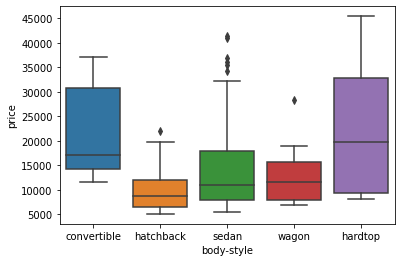

In [ ]:
#Prices of car groups
sns.boxplot(x="body-style", y="price", data=dataset)

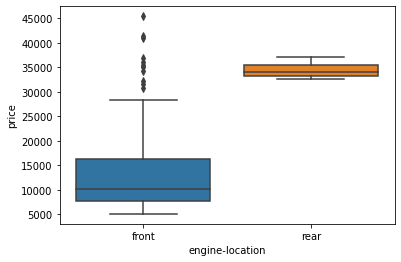

In [ ]:
#Prices of engine locations
sns.boxplot(x="engine-location", y="price", data=dataset)

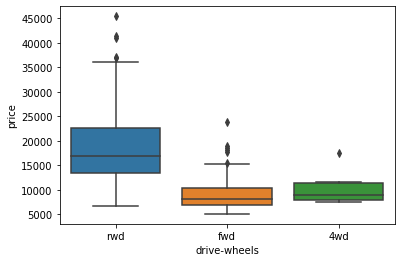

In [ ]:
#Prices of drive-wheels 
sns.boxplot(x="drive-wheels", y="price", data=dataset)

<b> <font color ='blue' >3. Pre-processing: Feature selection/extraction </font> <b> 

<b> Binning <b> 

Text(0.5, 1.0, 'HORSEPOWER BINS')

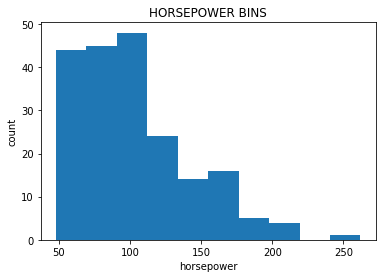

In [ ]:
#Check distribution of horsepower
plt.hist(dataset["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("HORSEPOWER BINS")

#From the distribution, we can split horsepowers into 3 groups: low from 50 to 100 and from 100 to 200 and above 200

In [ ]:
bins = np.linspace(min(dataset["horsepower"]),max(dataset["horsepower"]),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
bin_names = ['Low', 'Medium', 'High']


In [ ]:
#finalize values into bins
dataset['horsepower-binned'] = pd.cut(dataset['horsepower'], bins, labels=bin_names ,include_lowest = True)
dataset[['horsepower','horsepower-binned']]

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
...,...,...
196,114.0,Low
197,160.0,Medium
198,134.0,Medium
199,106.0,Low


In [ ]:
dataset[dataset['horsepower-binned'] == 'High']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-Litres/100km,highway-Litres/100km,length_normalized,width_normalized,height_normalized,horsepower-binned
46,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0,18.076923,13.823529,0.921192,0.980556,0.799331,High
102,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0,13.823529,10.217391,0.820279,0.943056,0.831104,High
123,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0,13.823529,9.400000,0.811629,0.902778,0.862876,High
124,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0,13.823529,9.400000,0.811629,0.902778,0.862876,High
125,3,122.0,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0,13.823529,9.400000,0.811629,0.902778,0.862876,High


In [ ]:
dataset["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

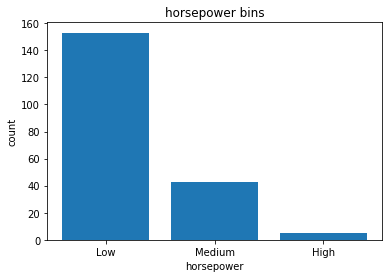

In [ ]:
plt.bar(bin_names, dataset["horsepower-binned"].value_counts())
# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<b> Labelling Categories with Dummy variables <b>

In [ ]:
dataset.columns


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-Litres/100km', 'highway-Litres/100km',
       'length_normalized', 'width_normalized', 'height_normalized',
       'horsepower-binned'],
      dtype='object')

In [ ]:
dummy_variable_1 = pd.get_dummies(dataset["fuel-type"])
dummy_variable_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [ ]:
dataset = pd.concat([dataset, dummy_variable_1], axis=1)

In [ ]:
dummy_variable_2 = pd.get_dummies(dataset["aspiration"])
dummy_variable_2

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [ ]:
dataset = pd.concat([dataset,dummy_variable_2],axis=1)

In [ ]:
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-Litres/100km,highway-Litres/100km,length_normalized,width_normalized,height_normalized,horsepower-binned,diesel,gas,std,turbo
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054,Low,0,1,1,0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054,Low,0,1,1,0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254,Medium,0,1,1,0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0.848630,0.919444,0.908027,Low,0,1,1,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0.848630,0.922222,0.908027,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,8.392857,0.907256,0.956944,0.928094,Low,0,1,1,0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,9.400000,0.907256,0.955556,0.928094,Medium,0,1,0,1
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,10.217391,0.907256,0.956944,0.928094,Medium,0,1,1,0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,8.703704,0.907256,0.956944,0.928094,Low,1,0,0,1


<b> From the highly correlated variables from part 2, we will perform P-Value test to check whether they are real causation of price <b>

In [ ]:
#p-value is < 0.001 : correlation is very significant
#p-value is < 0.05: correlation is significant
#p-value is < 0.1: the correlation is weakly significant
#p-value is > 0.1: no evidence that the correlation is significant

In [ ]:
import scipy.stats as stats

In [ ]:
#Horsepower vs Price
pearson_coef, p_value = stats.pearsonr(dataset['horsepower'], dataset['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.809574586956172  while P-value is  6.368997860938694e-48


<b> => P Value < 0.001 Hence Horsepower can definitely be used as a causation of Price <b>

In [ ]:
#Engine Size vs Price
pearson_coef, p_value = stats.pearsonr(dataset['engine-size'], dataset['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8723351674455185  while P-value is  9.265491622198389e-64


<b> => P Value < 0.001 Hence Engine Size can definitely be used as a causation of Price <b>

In [ ]:
#Length vs Price
pearson_coef, p_value = stats.pearsonr(dataset['length'], dataset['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.6906283804483639  while P-value is  8.016477466159328e-30


<b> => P Value < 0.001 Hence Length can definitely be used as a causation of Price <b>

In [ ]:
#Width vs Price 
pearson_coef, p_value = stats.pearsonr(dataset['width'], dataset['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.7512653440522674  while P-value is  9.200335510481516e-38


<b> => P Value < 0.001 Hence Width can definitely be used as a causation of Price <b>

In [ ]:
#Curb weight vs Price
pearson_coef, p_value = stats.pearsonr(dataset['curb-weight'], dataset['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8344145257702843  while P-value is  2.189577238894065e-53


<b> => P Value < 0.001 Hence Curb Weight can definitely be used as a causation of Price <b>

In [ ]:
#City-Litres/100km vs Price
pearson_coef, p_value = stats.pearsonr(dataset['city-Litres/100km'], dataset['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.7898975136626943  while P-value is  3.903106400939802e-44


<b> => P Value < 0.001 Hence City-Litres/100km can definitely be used as a causation of Price <b>

In [ ]:
#Highway-Litres/100km vs Price
pearson_coef, p_value = stats.pearsonr(dataset['highway-Litres/100km'], dataset['price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8011176263981974  while P-value is  3.046784581041456e-46


<b> => P Value < 0.001 Hence Highway-Litres/100km can definitely be used as a causation of Price <b>

<h2> Conclusion : Variables for building predicting models <h2> 

Length\
Width\
Curb-weight\
Engine-size\
Horsepower\
highway-Litres/100km\
city-Litres/100km

<b> <font color ='blue' >4. Linear Regression </font> <b> 

<b> Model Development <b>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x1 = dataset[['horsepower','curb-weight','engine-size','highway-Litres/100km','city-Litres/100km','length','width']]
y1 = dataset['price']

In [ ]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state=42)

In [ ]:
lm1 = LinearRegression()
lm1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhat1 = lm1.predict(x1_test)

In [ ]:
yhat1[0:5]

array([ 6859.07125078, 25120.71771903,  6097.07569507,  8067.80430938,
       13765.70420936])

In [ ]:
intercept = lm1.intercept_

In [ ]:
slopes = lm1.coef_

In [ ]:
intercept,slopes

(-46328.8417045379,
 array([ -6.79706517,   0.76106981,  86.83235411, 109.77306954,
        727.48420372,   9.79434796, 562.74819563]))

In [ ]:
print("Price = -46328.84 - 6.797 x horsepower + 0.761 x curb-weight + 86.832 x engine-size + 109.773 x highway-litres/100km + 727.484 x city-litres/100km + 9.794 x length + 562.748 x width")

Price = -46328.84 - 6.797 x horsepower + 0.761 x curb-weight + 86.832 x engine-size + 109.773 x highway-litres/100km + 727.484 x city-litres/100km + 9.794 x length + 562.748 x width


<b> Model Evaluation using Test set <b> 

In [ ]:
print('The full R-square is : ',lm1.score(x1,y1))
print('The train R-square is : ',lm1.score(x1_train,y1_train))
print('The test R-square is : ',lm1.score(x1_test,y1_test))



The full R-square is :  0.805472343434678
The train R-square is :  0.830242812942925
The test R-square is :  0.7665230745970728


<b> more than 80% of price can be explained by this multiple linear regression model. Both Train and Test Rsquare are quite high (more than 76%) <b>

In [ ]:
#Find MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y1_test,yhat1)
mae = mean_absolute_error(y1_test,yhat1)
print('The MSE of price and predicted value is : ',mse)
print('The MSA of price and predicted value is : ',mae)

The MSE of price and predicted value is :  25195257.801463347
The MSA of price and predicted value is :  3365.195139165231


In [ ]:
from scipy.stats.stats import pearsonr

In [ ]:
pearsonr(lm1.predict(x1_test),y1_test)

(0.9134311711574045, 9.163215234481407e-21)

Conclusion : Pearson's Correlation coefficient = ~0.91, 2 tailed p-value = ~0

<function matplotlib.pyplot.show>

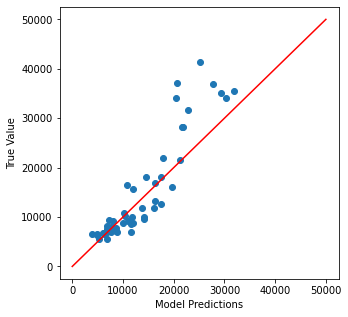

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(yhat1,y1_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 50000],[0, 50000],'k-',color='r')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

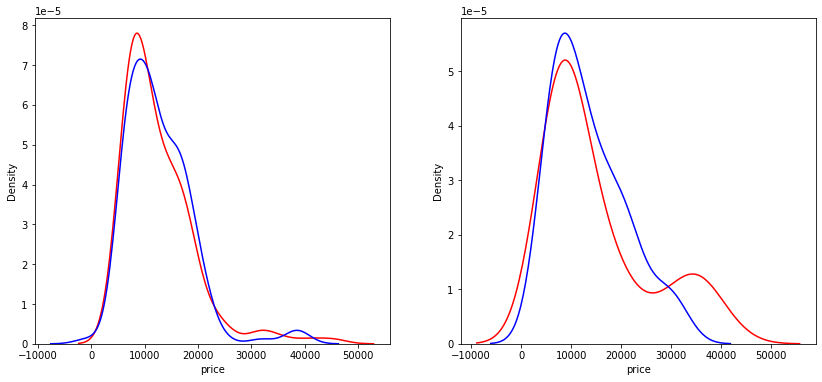

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y1_train,hist=False,color="r",
                  label="Actual Train Values")
sns.distplot(lm1.predict(x1_train),hist=False,color="b",
           label = "Predicted Train Values",ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y1_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(lm1.predict(x1_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax2)
plt.show()

<b> Pictures 1 illustrates that there is a quite decent performance in the Actual and Predicted values in the Test dataset. However, in the Actual dataset, there is a significant difference emerging after 18000

=> There is a high chance that this model should be polynomial regression

<b> Redevelope the model <b>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x1)

In [ ]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X_poly,y1,random_state=42)

In [ ]:
lm1 = LinearRegression()
lm1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhat1 = lm1.predict(x1_test)

In [ ]:
yhat1[0:5]

array([ 6600.27375031, 27386.32443237,  6219.20153046,  7871.91068268,
       14290.55851746])

In [ ]:
print('The full R-square is : ',lm1.score(X_poly,y1))
print('The train R-square is : ',lm1.score(x1_train,y1_train))
print('The test R-square is : ',lm1.score(x1_test,y1_test))



The full R-square is :  0.8972125396624856
The train R-square is :  0.9104698118583723
The test R-square is :  0.8764203110227203


<function matplotlib.pyplot.show>

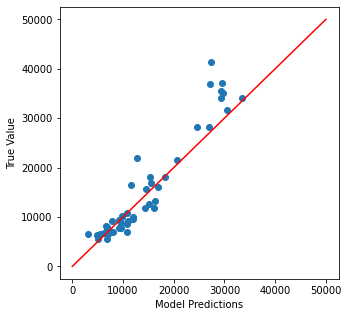

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(yhat1,y1_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 50000],[0, 50000],'k-',color='r')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

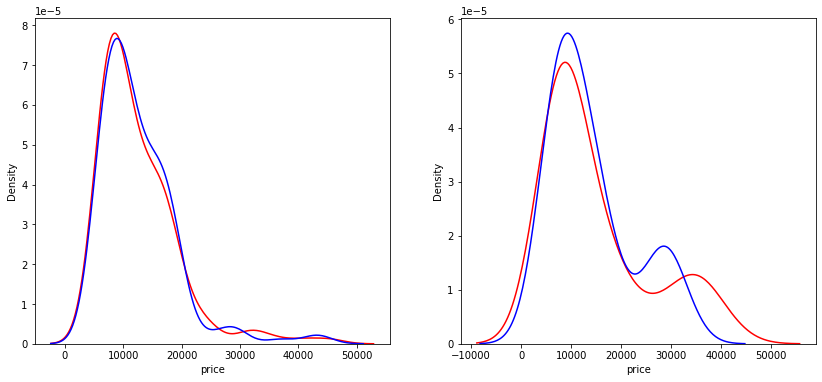

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y1_train,hist=False,color="r",
                  label="Actual Train Values")
sns.distplot(lm1.predict(x1_train),hist=False,color="b",
           label = "Predicted Train Values",ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y1_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(lm1.predict(x1_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax2)
plt.show()

=> At polynomial degree = 2 , model has better performance.

In [ ]:
i = 3 
while i <= 10 : 
  poly_reg = PolynomialFeatures(degree=i)
  X_poly = poly_reg.fit_transform(x1)
  x1_train,x1_test,y1_train,y1_test = train_test_split(X_poly,y1,random_state=42)
  lm1 = LinearRegression()
  lm1.fit(x1_train,y1_train)
  yhat1 = lm1.predict(x1_test)
  print('At i =',i)
  print('The full R-square is : ',lm1.score(X_poly,y1))
  print('The train R-square is : ',lm1.score(x1_train,y1_train))
  print('The test R-square is : ',lm1.score(x1_test,y1_test))
  print(' ')
  i += 1 





At i = 3
The full R-square is :  -11.78106538043123
The train R-square is :  0.9789229076231141
The test R-square is :  -28.307179705283627
 
At i = 4
The full R-square is :  -55415.752141513934
The train R-square is :  0.9989856551635283
The test R-square is :  -127185.12050209186
 
At i = 5
The full R-square is :  -93464.96150386243
The train R-square is :  0.9989858609050113
The test R-square is :  -214511.26626818258
 
At i = 6
The full R-square is :  -268250.81223073223
The train R-square is :  0.9989852717990572
The test R-square is :  -615659.5406796831
 
At i = 7
The full R-square is :  -896472.4736521735
The train R-square is :  0.9989857476727491
The test R-square is :  -2057481.2578154104
 
At i = 8
The full R-square is :  -3121315.7845165017
The train R-square is :  0.9989855228200795
The test R-square is :  -7163684.370255967
 
At i = 9
The full R-square is :  -11098358.974941567
The train R-square is :  0.9989826050246058
The test R-square is :  -25471671.529603027
 
At i

We can see that from degree = 2 , if we increase the degree of the polynomial model, it will trigger overfitting. 
=> Best result is polynomial with degree = 2 

<h1> Loan Status Prediction <h1>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration


### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 

### Load Data From CSV File  

In [ ]:
#Read CSV file: loan_train.csv
dataset = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv')

In [ ]:
dataset

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [ ]:
dataset.shape

(346, 10)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [ ]:
dataset.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
dataset.tail(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [ ]:
dataset.describe(include = "all")

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


In [ ]:
dataset.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [ ]:
null_data=dataset.isnull()
null_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Checking Column Quality 
for i in null_data.columns.values.tolist():
    print(i)
    print(null_data[i].value_counts())
    print("----------------------------------")

Unnamed: 0
False    346
Name: Unnamed: 0, dtype: int64
----------------------------------
Unnamed: 0.1
False    346
Name: Unnamed: 0.1, dtype: int64
----------------------------------
loan_status
False    346
Name: loan_status, dtype: int64
----------------------------------
Principal
False    346
Name: Principal, dtype: int64
----------------------------------
terms
False    346
Name: terms, dtype: int64
----------------------------------
effective_date
False    346
Name: effective_date, dtype: int64
----------------------------------
due_date
False    346
Name: due_date, dtype: int64
----------------------------------
age
False    346
Name: age, dtype: int64
----------------------------------
education
False    346
Name: education, dtype: int64
----------------------------------
Gender
False    346
Name: Gender, dtype: int64
----------------------------------


<b> => No missing values <b> 

In [ ]:
haha = dataset['terms']
mean = np.mean(haha) 
std = np.std(haha) 
print('mean of term is', mean) 
print('std. deviation is', std) 

mean of term is 22.653179190751445
std. deviation is 7.979450033725589


In [ ]:
dataset['terms'].describe()

count    346.000000
mean      22.653179
std        7.991006
min        7.000000
25%       15.000000
50%       30.000000
75%       30.000000
max       30.000000
Name: terms, dtype: float64

In [ ]:
threshold = 2
outlier = [] 
for i in haha: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in term is', outlier) 

outlier in term is []


In [ ]:
dataset['age'].describe()

count    346.000000
mean      30.939306
std        6.039418
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

In [ ]:
hoho = dataset['age']
mean = np.mean(hoho) 
std = np.std(hoho) 
print('mean of age is', mean) 
print('std. deviation is', std) 

mean of age is 30.939306358381504
std. deviation is 6.030683929025734


In [ ]:
del z 
del i 
del threshold

In [ ]:
threshold = 2  
outlier = [] 
for i in hoho: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in age is', outlier) 


outlier in age is [45, 50, 44, 45, 44, 46, 45, 47, 50, 51, 44, 44, 50, 45, 46]


<b> => Although these ages are outliers, they are actually correct and logical. It just reveals that seniors do not borrow money as much as juniors <b>. Therefore, they are not excluded from the dataset. 

In [ ]:
dataset['Principal'].describe()

count     346.000000
mean      943.641618
std       109.425530
min       300.000000
25%       900.000000
50%      1000.000000
75%      1000.000000
max      1000.000000
Name: Principal, dtype: float64

In [ ]:
hehe = dataset['Principal']
mean = np.mean(hehe) 
std = np.std(hehe) 
print('mean of term is', mean) 
print('std. deviation is', std) 

mean of term is 943.6416184971098
std. deviation is 109.26728591298925


In [ ]:
threshold = 2  
outlier = [] 
for i in hehe: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in principal is', outlier) 


outlier in principal is []


<b> Conclusion : The dataset does not have any illogical outliers to exclude <b>  

### Convert 'due_date', 'effective_date' to date time object 

In [ ]:
dataset['due_date'] = pd.to_datetime(dataset['due_date'])
dataset['effective_date'] = pd.to_datetime(dataset['effective_date'])


In [ ]:
dataset

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


# Data visualization

How many sample of each class is in our data set?

In [ ]:
dataset['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

**260** people have paid off the loan on time while **86** have gone into collection 

In [ ]:
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

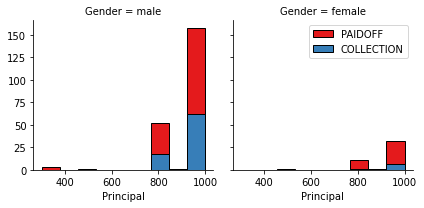

In [ ]:
bins = np.linspace(dataset.Principal.min(), dataset.Principal.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

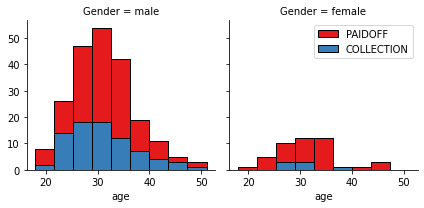

In [ ]:
bins = np.linspace(dataset.age.min(), dataset.age.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

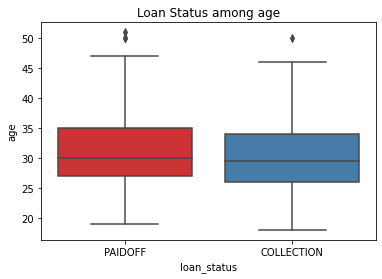

In [ ]:
sns.boxplot(x='loan_status',y='age',palette="Set1",data=dataset)
plt.title('Loan Status among age')
plt.show()

# Pre-processing:  Feature selection/extraction

Lets look at the day of the week people get the loan¶


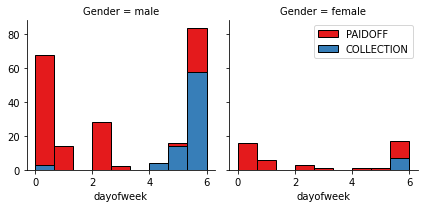

In [ ]:
dataset['dayofweek'] = dataset['effective_date'].dt.dayofweek
bins = np.linspace(dataset.dayofweek.min(), dataset.dayofweek.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [ ]:
dataset['weekend'] = dataset['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [ ]:
dataset

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0


## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [ ]:
dataset.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

**86.5** % of female pay there loans while only **73.1** % of males pay there loan

Lets convert male to 0 and female to 1:


In [ ]:
dataset['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [ ]:
dataset

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,0,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,0,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,0,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,0,0,0


## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [ ]:
dataset.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [ ]:
dataset[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [ ]:
Feature = dataset[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(dataset['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:
- X is inputs, X = Features

In [ ]:
x = Feature

In [ ]:
x

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0
342,1000,30,25,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


In [ ]:
y = dataset['loan_status'].values

In [ ]:
y

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

## Scaler Data 

Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

In [ ]:
x= preprocessing.StandardScaler().fit(x).transform(x)

In [ ]:
x

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

# Classification 

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression().fit(x, y)

In [ ]:
LR.score(x,y)

0.7543352601156069

In [ ]:
yhat_train = LR.predict(x)

# Model Evaluation using Test set

In [ ]:
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss 

### Load Test set for evaluation 

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_test.csv')

In [ ]:
test_df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Processing


In [ ]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

In [ ]:
x_test = Feature_test

In [ ]:
Feature_test

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0
5,700,15,33,0,1,0,1,0
6,1000,15,24,0,1,0,0,1
7,1000,30,32,0,1,1,0,0
8,800,15,27,1,1,0,0,1
9,1000,15,37,0,1,0,0,1


In [ ]:
x_test = preprocessing.StandardScaler().fit(x_test).transform(x_test)
x_test

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677],
       [-1.24479571, -0.78854628,  0.19650211, -0.50578054,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588, -0.78854628, -1.31937134, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [ 0.49362588,  0.92844966,  0.02807173, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677],
       [-0.66532184, -0.78854628

In [ ]:
yhat_test = LR.predict(x_test)


Model Evaluation

In [ ]:
yhat_test

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF'], dtype=object)

In [ ]:
y_test = test_df['loan_status'].values

In [ ]:
accuracy_test = round(accuracy_score(y_test,yhat_test)*100,2)

In [ ]:
accuracy = round(accuracy_score(y,yhat_train)*100,2)

In [ ]:
print("The train accuracy is",accuracy,"%")

The train accuracy is 75.43 %


In [ ]:
print("The test accuracy is",accuracy_test,"%")

The test accuracy is 75.93 %


In [ ]:
results = pd.DataFrame({'Algorithm':'Logistic Regression', 'Accuracy Score': accuracy},index=[0])

In [ ]:
results

,Algorithm,Accuracy Score
0,Logistic Regression,75.43


<h1> Heart Disease <h1>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/dataset_2190_cholesterol.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [ ]:
df.tail()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131
301,57,0,2,130,0,2,174,0,0.0,2,1,3,1,236
302,38,1,3,138,0,0,173,0,0.0,1,?,3,0,175


In [ ]:
df.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,275.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,564.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


Check null values

In [ ]:
df=df.replace("?", np.nan)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
chol        0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   fbs       297 non-null    int64  
 5   restecg   297 non-null    int64  
 6   thalach   297 non-null    int64  
 7   exang     297 non-null    int64  
 8   oldpeak   297 non-null    float64
 9   slope     297 non-null    int64  
 10  ca        297 non-null    object 
 11  thal      297 non-null    object 
 12  num       297 non-null    int64  
 13  chol      297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [ ]:
df.shape

(297, 14)

In [ ]:
#pp.ProfileReport(df)

In [ ]:
X = df.drop('chol',axis=1)
y = df['chol']

In [ ]:
X.corr()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,-0.092399,0.110471,0.290476,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.159620
fbs,0.132062,0.038850,-0.057663,0.180860,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.501461
slope,0.159405,0.033345,0.151079,0.121172,0.047819,0.135141,-0.389307,0.250572,0.579037,1.000000,0.374689


<b> => No strong correlation <b>

In [ ]:
k = round(np.sqrt(len(df))/2,0)
print(k)

9.0


In [ ]:
#Calculate acccuracy of models by different algorithm
# Logistic, Naive Bayes, SVM, RandomForestRegressor, DecisionTreeRegressor,KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
#split df set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
#List of Algorithm 
models = [ LogisticRegression(solver='liblinear'),
    GaussianNB(),
    SVC(kernel='linear'),
    RandomForestRegressor(n_estimators=200),
    DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=int(k))]
CV = 10 
entries = []
i=0
for model in models:
    mae_l = []
    mse_l = []
    time =[]
    for j in range(CV):
        t1 = datetime.datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        t2= datetime.datetime.now()
        d = round((t2-t1).microseconds/1000,1)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae_l.append(mae)
        mse_l.append(mse)
        time.append(d)
    print(model.__class__.__name__, mae_l)
    entries.append([model_name, np.array(mae_l).mean(),np.array(mse_l).mean(),np.array(time).mean()])
    i += 1
cv_df = pd.DataFrame(entries, columns=['model_name', 'Mean MAE','Mean MSE','Time'])
cv_df

LogisticRegression [46.13333333333333, 46.13333333333333, 46.13333333333333, 46.13333333333333, 46.13333333333333, 46.13333333333333, 46.13333333333333, 46.13333333333333, 46.13333333333333, 46.13333333333333]
GaussianNB [43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0]
SVC [62.083333333333336, 62.083333333333336, 62.083333333333336, 62.083333333333336, 62.083333333333336, 62.083333333333336, 62.083333333333336, 62.083333333333336, 62.083333333333336, 62.083333333333336]
RandomForestRegressor [40.52941666666666, 40.84791666666665, 40.310583333333334, 40.821666666666665, 40.546583333333345, 40.36808333333333, 40.48541666666666, 41.04899999999999, 40.09349999999999, 40.69050000000002]
DecisionTreeRegressor [54.25, 50.68333333333333, 55.45, 51.86666666666667, 54.083333333333336, 50.65, 54.483333333333334, 55.516666666666666, 55.61666666666667, 51.6]
KNeighborsRegressor [34.62222222222223, 34.62222222222223, 34.62222222222223, 34.62222222222223, 34.62222222222223, 34.62222222222

,model_name,Mean MAE,Mean MSE,Time
0,LogisticRegression,46.133333,3328.933333,126.51
1,GaussianNB,43.000000,2746.766667,8.46
2,SVC,62.083333,6233.350000,87.04
3,RandomForestRegressor,40.574267,2196.269918,389.37
4,DecisionTreeRegressor,53.420000,4170.643333,2.09
5,KNeighborsRegressor,34.622222,1651.212757,1.32


Comments :

+ SVC have the largest MSE & MAEMAE<br>
+ RandomForestRegressor have small MSE but run time is long  389 ms<br>
+ GaussianNB has acceptable MAE & MSE & run time
+ Decision Tree is the 2nd fastest but poor result
+ KNeighborsRegressor MSE , MAE is the smallest and  duration about 1.32 ms.

<b> => Choose KNN <b>

In [ ]:
from sklearn.metrics import accuracy_score
list_k = []
list_mse = []
list_score_train=[]
list_score_test=[]
list_train_test=[]
#|train - test|
for k_value in range(2,10):
    list_k.append(k_value)
    neigh =KNeighborsRegressor(n_neighbors=k_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    list_mse.append(mse)
    list_score_train.append(neigh.score(X_train,y_train))
    list_score_test.append(neigh.score(X_test,y_test))
    list_train_test.append(np.abs(neigh.score(X_train,y_train) - neigh.score(X_test,y_test )))
    print('MSE is ',mse,' for k_value :',k_value)
vi_tri = list_mse.index(min(list_mse))  
k=list_k[vi_tri]
print("\n The optimal number of neighbors is %d with %0.1f%%"%(k,list_mse[vi_tri] ))
print('Score :',list_train_test[vi_tri])


MSE is  3872.6291666666666  for k_value : 2
MSE is  2350.1166666666672  for k_value : 3
MSE is  2063.684375  for k_value : 4
MSE is  1866.4133333333332  for k_value : 5
MSE is  1683.5388888888888  for k_value : 6
MSE is  1722.8336734693878  for k_value : 7
MSE is  1671.0966145833333  for k_value : 8
MSE is  1651.2127572016464  for k_value : 9

 The optimal number of neighbors is 9 with 1651.2%
Score : 0.07622250827266552


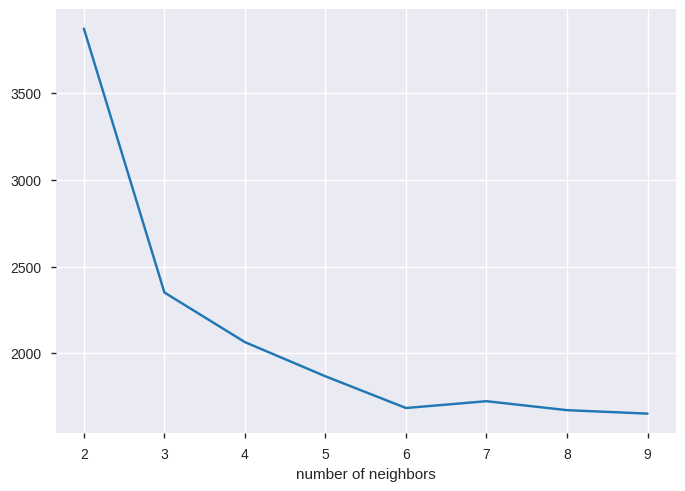

In [ ]:
plt.plot(list_k, list_mse)
plt.xlabel('MSE')
plt.xlabel('number of neighbors')
plt.show()

elbow appears at k = 6 => k=6 is ok optimize for KNN

In the test above we use k = 9 

=> rerun at k = 6 

In [ ]:
k = 6
#Calculate acccuracy of models by different algorithm
# Logistic, Naive Bayes, SVM, RandomForestRegressor, DecisionTreeRegressor,KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
#split df set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
#List of Algorithm 
models = [ LogisticRegression(solver='liblinear'),
    GaussianNB(),
    SVC(kernel='linear'),
    RandomForestRegressor(n_estimators=200),
    DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=int(k))]
CV = 10 
entries = []
i=0
for model in models:
    mae_l = []
    mse_l = []
    time =[]
    for j in range(CV):
        t1 = datetime.datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        t2= datetime.datetime.now()
        d = round((t2-t1).microseconds/1000,1)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae_l.append(mae)
        mse_l.append(mse)
        time.append(d)
    print(model.__class__.__name__, mae_l)
    entries.append([model_name, np.array(mae_l).mean(),np.array(mse_l).mean(),np.array(time).mean()])
    i += 1
cv_df = pd.DataFrame(entries, columns=['model_name', 'Mean MAE','Mean MSE','Time'])
cv_df

LogisticRegression [67.46666666666667, 67.46666666666667, 67.46666666666667, 67.46666666666667, 67.46666666666667, 67.46666666666667, 67.46666666666667, 67.46666666666667, 67.46666666666667, 67.46666666666667]
GaussianNB [48.38333333333333, 48.38333333333333, 48.38333333333333, 48.38333333333333, 48.38333333333333, 48.38333333333333, 48.38333333333333, 48.38333333333333, 48.38333333333333, 48.38333333333333]
SVC [54.68333333333333, 54.68333333333333, 54.68333333333333, 54.68333333333333, 54.68333333333333, 54.68333333333333, 54.68333333333333, 54.68333333333333, 54.68333333333333, 54.68333333333333]
RandomForestRegressor [47.75250000000001, 47.69783333333333, 46.62308333333333, 46.77316666666665, 46.96391666666667, 47.26508333333333, 47.66408333333334, 47.23466666666666, 47.35291666666667, 46.801083333333324]
DecisionTreeRegressor [70.9, 67.0, 63.68333333333333, 69.1, 68.36666666666666, 69.98333333333333, 68.43333333333334, 69.53333333333333, 64.31666666666666, 66.81666666666666]
KNeig

,model_name,Mean MAE,Mean MSE,Time
0,LogisticRegression,67.466667,7273.733333,120.05
1,GaussianNB,48.383333,3693.783333,8.20
2,SVC,54.683333,4797.450000,94.73
3,RandomForestRegressor,47.212833,3431.851325,387.12
4,DecisionTreeRegressor,67.813333,7179.710000,2.21
5,KNeighborsRegressor,43.800000,2967.140741,1.28


=> at k = 6 , KNN is still the best algorithm, however , MAE and MSE increase nearly 50% while time run only decreases a little 
=> choose KNN at k = 9 

<h1> Wine Classification <h1>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=['Type','Alcohol','Malic acid','Ash',
                                                                                                    'Alcalinity of ash','Magnesium','Total Phenols','Flavanoids','Nonflavanoids phenols','Proanthocyanins',
                                                                                                    'Color intensify','Hue','OD280/OD315 of diluted wines','Proline']) 


In [ ]:
data.head(5)

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensify,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X = data.iloc[:, 1:14]

In [ ]:
y = data.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.model_selection import cross_val_score

In [ ]:
models = [
    LogisticRegression(max_iter=200),
    GaussianNB(),
    SVC(kernel='linear'),
    RandomForestClassifier(n_estimators=200),
    DecisionTreeClassifier()
]
CV = 10
entries = []
i=0
for model in models:
    scores_train = []
    scores_test = []
    times = []
    abs_scores = []
    for j in range(CV):
        t1 = datetime.datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train,y_train)
        t2 = datetime.datetime.now()    
        d = round((t2 - t1).microseconds/1000,1) # => miliseconds
        score_train = model.score(X_train,y_train)
        score_test = model.score(X_test,y_test)
        abs_score = abs(score_train - score_test)          
        
        scores_train.append(score_train)          
        scores_test.append(score_test)
        abs_scores.append(abs_score)
        times.append(d) 

    print(model.__class__.__name__, scores_test)
    entries.append([model_name, np.array(scores_train).mean(), 
                    np.array(scores_test).mean(), np.array(abs_scores).mean(), 
                    np.array(times).mean()])
    i += 1
cv_df = pd.DataFrame(entries, 
                     columns=['model_name', 'score_train_mean', 
                              'score_test_mean', 'abs|score|', 'time_mean'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression [0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629]
GaussianNB [0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815]
SVC [0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444]
RandomForestClassifier [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
DecisionTreeClassifier [0.9074074074074074, 0.9074074074074074, 0.9074074074074074, 0.9074074074074074, 0.9074074074074074, 0.9074074074074074, 0.9074074074074074, 0.9074074074074074, 0.9074074074074074, 0.9074074074074074]


In [ ]:
cv_df


,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
0,LogisticRegression,0.983871,0.962963,0.020908,66.81
1,GaussianNB,0.991935,0.981481,0.010454,1.12
2,SVC,1.000000,0.944444,0.055556,149.39
3,RandomForestClassifier,1.000000,1.000000,0.000000,285.72
4,DecisionTreeClassifier,1.000000,0.907407,0.092593,1.33


<h1> Extra : Cooling & Heating Energy prediction <h1> 

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
dataset = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx',names=["Relative Compactness","Surface Area","Wall Area","Roof Area",
                                                   "Overall Height","Orientation","Glazing Area","Glazing Area Distribution",
                                                  "Heating Load","Cooling Load"])

In [ ]:
dataset.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
#ProfileReport(dataset)

In [ ]:
#Check correlation, lighter = more positive correlation , darker = more negative correlation   
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True)

<b> <font color ='blue' >2. Data Visualization </font> <b> 

In [ ]:
dataset[["Relative Compactness", "Heating Load"]].corr()

,Relative Compactness,Heating Load
Relative Compactness,1.000000,0.622272
Heating Load,0.622272,1.000000


In [ ]:
dataset[["Relative Compactness", "Cooling Load"]].corr()

,Relative Compactness,Cooling Load
Relative Compactness,1.000000,0.634339
Cooling Load,0.634339,1.000000


In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False)
fig.tight_layout()
sns.scatterplot(x="Relative Compactness", y="Heating Load", data=dataset,ax=axs[0])
sns.scatterplot(x="Relative Compactness", y="Cooling Load", data=dataset,ax=axs[1])


In [ ]:
dataset[["Surface Area", "Heating Load"]].corr()

,Surface Area,Heating Load
Surface Area,1.00000,-0.65812
Heating Load,-0.65812,1.00000


In [ ]:
dataset[["Surface Area", "Cooling Load"]].corr()

,Surface Area,Cooling Load
Surface Area,1.000000,-0.672999
Cooling Load,-0.672999,1.000000


In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False)
fig.tight_layout()
sns.scatterplot(x="Surface Area", y="Heating Load", data=dataset,ax=axs[0])
sns.scatterplot(x="Surface Area", y="Cooling Load", data=dataset,ax=axs[1])


In [ ]:
dataset[["Wall Area", "Heating Load"]].corr()

,Wall Area,Heating Load
Wall Area,1.000000,0.455671
Heating Load,0.455671,1.000000


In [ ]:
dataset[["Wall Area", "Cooling Load"]].corr()

,Wall Area,Cooling Load
Wall Area,1.000000,0.427117
Cooling Load,0.427117,1.000000


In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False)
fig.tight_layout()
sns.scatterplot(x="Wall Area", y="Heating Load", data=dataset,ax=axs[0])
sns.scatterplot(x="Wall Area", y="Cooling Load", data=dataset,ax=axs[1])


In [ ]:
dataset[["Roof Area", "Heating Load"]].corr()

,Roof Area,Heating Load
Roof Area,1.000000,-0.861828
Heating Load,-0.861828,1.000000


In [ ]:
dataset[["Roof Area", "Cooling Load"]].corr()

,Roof Area,Cooling Load
Roof Area,1.000000,-0.862547
Cooling Load,-0.862547,1.000000


In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False)
fig.tight_layout()
sns.scatterplot(x="Roof Area", y="Heating Load", data=dataset,ax=axs[0])
sns.scatterplot(x="Roof Area", y="Cooling Load", data=dataset,ax=axs[1])


In [ ]:
dataset[["Overall Height", "Heating Load"]].corr()

,Overall Height,Heating Load
Overall Height,1.00000,0.88943
Heating Load,0.88943,1.00000


In [ ]:
dataset[["Overall Height", "Cooling Load"]].corr()

,Overall Height,Cooling Load
Overall Height,1.000000,0.895785
Cooling Load,0.895785,1.000000


In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False)
fig.tight_layout()
sns.scatterplot(x="Overall Height", y="Heating Load", data=dataset,ax=axs[0])
sns.scatterplot(x="Overall Height", y="Cooling Load", data=dataset,ax=axs[1])


In [ ]:
dataset[["Orientation", "Heating Load"]].corr()

,Orientation,Heating Load
Orientation,1.000000,-0.002587
Heating Load,-0.002587,1.000000


In [ ]:
dataset[["Orientation", "Cooling Load"]].corr()

,Orientation,Cooling Load
Orientation,1.00000,0.01429
Cooling Load,0.01429,1.00000


In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False)
fig.tight_layout()
sns.scatterplot(x="Orientation", y="Heating Load", data=dataset,ax=axs[0])
sns.scatterplot(x="Orientation", y="Cooling Load", data=dataset,ax=axs[1])


In [ ]:
dataset[["Glazing Area", "Heating Load"]].corr()

,Glazing Area,Heating Load
Glazing Area,1.000000,0.269842
Heating Load,0.269842,1.000000


In [ ]:
dataset[["Glazing Area", "Cooling Load"]].corr()

,Glazing Area,Cooling Load
Glazing Area,1.000000,0.207505
Cooling Load,0.207505,1.000000


In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False)
fig.tight_layout()
sns.scatterplot(x="Glazing Area", y="Heating Load", data=dataset,ax=axs[0])
sns.scatterplot(x="Glazing Area", y="Cooling Load", data=dataset,ax=axs[1])


In [ ]:
dataset[["Glazing Area Distribution", "Heating Load"]].corr()

,Glazing Area Distribution,Heating Load
Glazing Area Distribution,1.000000,0.087368
Heating Load,0.087368,1.000000


In [ ]:
dataset[["Glazing Area Distribution", "Cooling Load"]].corr()

,Glazing Area Distribution,Cooling Load
Glazing Area Distribution,1.000000,0.050525
Cooling Load,0.050525,1.000000


In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False)
fig.tight_layout()
sns.scatterplot(x="Glazing Area Distribution", y="Heating Load", data=dataset,ax=axs[0])
sns.scatterplot(x="Glazing Area Distribution", y="Cooling Load", data=dataset,ax=axs[1])


<b> <font color ='blue' >3. Pre-processing: Feature selection/extraction </font> <b> 

In [ ]:
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


<b>Data Normalization <b>

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
nr = Normalizer(copy=False)

In [ ]:
x = dataset.drop(['Heating Load','Cooling Load'], axis=1)

In [ ]:
x = nr.fit_transform(X)

In [ ]:
y = dataset[['Heating Load','Cooling Load']]


<b> P Value Test for causation variables that are correlated with independent variables (more than 0.6) <b> 

#p-value is < 0.001 : correlation is very significant
#p-value is < 0.05: correlation is significant
#p-value is < 0.1: the correlation is weakly significant
#p-value is > 0.1: no evidence that the correlation is significant

In [ ]:
import scipy.stats as stats

In [ ]:
#Relative Compactness vs Heating Load
pearson_coef, p_value = stats.pearsonr(dataset['Relative Compactness'], dataset['Heating Load'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.6222719356777702  while P-value is  1.5915756113581834e-83


In [ ]:
#Relative Compactness vs Cooling Load
pearson_coef, p_value = stats.pearsonr(dataset['Relative Compactness'], dataset['Cooling Load'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.6343390663353593  while P-value is  1.0608759912582303e-87


<b> => P Value < 0.001 Hence Relative Compactness can definitely be used as a causation of Heating Load and Cooling Load <b>

<i> Surface Area <i> 

In [ ]:
#Surface Area vs Heating Load
pearson_coef, p_value = stats.pearsonr(dataset['Surface Area'], dataset['Heating Load'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is -0.6581199170654204  while P-value is  1.6873727592213314e-96


In [ ]:
#Surface Area vs Cooling Load
pearson_coef, p_value = stats.pearsonr(dataset['Surface Area'], dataset['Cooling Load'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is -0.6729989333544866  while P-value is  2.0052123210792597e-102


<b> => P Value < 0.001 Hence Surface Area can definitely be used as a causation of Heating Load and Cooling Load <b>

<i> Roof Area <i> 

In [ ]:
#Roof Area vs Heating Load
pearson_coef, p_value = stats.pearsonr(dataset['Roof Area'], dataset['Heating Load'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is -0.8618280515790429  while P-value is  4.9174220135254555e-228


In [ ]:
#Roof Area vs Cooling Load 
pearson_coef, p_value = stats.pearsonr(dataset['Roof Area'], dataset['Cooling Load'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is -0.862546603524974  while P-value is  7.732002122015264e-229


<b> => P Value < 0.001 Hence Roof Area can definitely be used as a causation of Heating Load and Cooling Load <b>

<i> Overall Height <i> 

In [ ]:
#Overall Height vs Heating Load
pearson_coef, p_value = stats.pearsonr(dataset['Overall Height'], dataset['Heating Load'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8894304644356393  while P-value is  1.1417039126754208e-262


In [ ]:
#Overall Height vs Cooling Load 
pearson_coef, p_value = stats.pearsonr(dataset['Overall Height'], dataset['Cooling Load'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8957851688924499  while P-value is  5.855770613018753e-272


<b> => P Value < 0.001 Hence Overall Height can definitely be used as a causation of Heating Load and Cooling Load <b>

<h2> Conclusion : Variables for building predicting models <h2> 

Relative Compactness\
Surface Area\
Roof Area\
Overall Height

<b> <font color ='blue' >4. Linear Regression </font> <b> 

<b> Model Development <b>

In [ ]:
#Predicting Heating Load

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x1 = dataset[['Relative Compactness','Surface Area','Roof Area','Overall Height']]
y1 = dataset['Heating Load']
y2 = dataset['Cooling Load']

In [ ]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state=42)

In [ ]:
lm1 = LinearRegression()
lm1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhat1 = lm1.predict(x1_test)

In [ ]:
intercept = lm1.intercept_

In [ ]:
slopes = lm1.coef_

In [ ]:
intercept,slopes

(114.17143197013357,
 array([-7.76561882e+01, -4.10523306e-02, -1.39171392e-01,  3.73197131e+00]))

In [ ]:
print("Heating Load = 114.17 - 77.656 x Relative Compactness -0.041 x surface area - 0.1391 x roof area + 3.731 x Overall Height")

Heating Load = 114.17 - 77.656 x Relative Compactness -0.041 x surface area - 0.1391 x roof area + 3.731 x Overall Height


In [ ]:
#Predicting Cooling Load

In [ ]:
x1_train,x1_test,y2_train,y2_test = train_test_split(x1,y2,random_state=42)

In [ ]:
lm1 = LinearRegression()
lm1.fit(x1_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yhat2 = lm1.predict(x1_test)

In [ ]:
intercept = lm1.intercept_

In [ ]:
slopes = lm1.coef_

In [ ]:
intercept,slopes

(126.44343155741367,
 array([-8.34809010e+01, -5.80755265e-02, -1.08097690e-01,  3.80143358e+00]))

In [ ]:
print("Cooling Load = 126.443 - 83.48 x Relative Compactness -0.058 x surface area - 0.108 x roof area + 3.801 x Overall Height")

Cooling Load = 126.443 - 83.48 x Relative Compactness -0.058 x surface area - 0.108 x roof area + 3.801 x Overall Height


<b> Model Evaluation using Test set <b> 

In [ ]:
#For Heating Load
print('The full R-square is : ',lm1.score(x1,y1))
print('The train R-square is : ',lm1.score(x1_train,y1_train))
print('The test R-square is : ',lm1.score(x1_test,y1_test))

The full R-square is :  0.7906170878182259
The train R-square is :  0.7881217140435985
The test R-square is :  0.7967576672720091


In [ ]:
#For Cooling Load
print('The full R-square is : ',lm1.score(x1,y2))
print('The train R-square is : ',lm1.score(x1_train,y2_train))
print('The test R-square is : ',lm1.score(x1_test,y2_test))


The full R-square is :  0.8441324785662802
The train R-square is :  0.844495963199136
The test R-square is :  0.8419799381710321


<b> more than 84% of Cooling Load and 79% of Heating Load can be explained by this multiple linear regression model. Both Train and Test Rsquare are quite high (more than 79%) <b>

In [ ]:
#Find MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
#Heating Load
mse = mean_squared_error(y1_test,yhat1)
mae = mean_absolute_error(y1_test,yhat1)
print('The MSE of price and predicted value is : ',mse)
print('The MSA of price and predicted value is : ',mae)

The MSE of price and predicted value is :  16.82733082563615
The MSA of price and predicted value is :  3.1452857816715514


In [ ]:
#Cooling Load
mse = mean_squared_error(y2_test,yhat2)
mae = mean_absolute_error(y2_test,yhat2)
print('The MSE of price and predicted value is : ',mse)
print('The MSA of price and predicted value is : ',mae)

The MSE of price and predicted value is :  14.753563564173724
The MSA of price and predicted value is :  2.942161331717669


In [ ]:
from scipy.stats.stats import pearsonr
#Heating Load
print(pearsonr(lm1.predict(x1_test),y1_test))
#Cooling Load
print(pearsonr(lm1.predict(x1_test),y2_test))

(0.9164258684819326, 1.7101505628179511e-77)
(0.918213091758569, 2.392155537154353e-78)


Conclusion : Pearson's Correlation coefficient = ~0.91, 2 tailed p-value = ~0 for both Heating Load and Cooling Load

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(yhat1,y1_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 60],[0, 60],'k-',color='r')
plt.title("Heating Load")
plt.show

<function matplotlib.pyplot.show>

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(yhat2,y2_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 60],[0, 60],'k-',color='r')
plt.title("Cooling Load")
plt.show

<function matplotlib.pyplot.show>

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y1_train,hist=False,color="r",
                  label="Actual Train Values")
sns.distplot(lm1.predict(x1_train),hist=False,color="b",
           label = "Predicted Train Values",ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y1_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(lm1.predict(x1_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y2_train,hist=False,color="r",
                  label="Actual Train Values")
sns.distplot(lm1.predict(x1_train),hist=False,color="b",
           label = "Predicted Train Values",ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y2_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(lm1.predict(x1_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Heating Load = 114.17 - 77.656 x Relative Compactness -0.041 x surface area - 0.1391 x roof area + 3.731 x Overall Height\
Cooling Load = 126.443 - 83.48 x Relative Compactness -0.058 x surface area - 0.108 x roof area + 3.801 x Overall Height
